# veri setini açalım 

In [222]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D

# Load the dataset
file_path = '/workspaces/Python_final_project/BankChurners.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
df.tail()


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462,0.000191,0.999810
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511,0.995270,0.004729
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,5409.0,0,5409.0,0.819,10291,60,0.818,0.000,0.997880,0.002118
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,5281.0,0,5281.0,0.535,8395,62,0.722,0.000,0.996710,0.003294
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,...,10388.0,1961,8427.0,0.703,10294,61,0.649,0.189,0.996620,0.003377


# veriyi inceleyelim 


In [223]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

Sütunlar: Veri seti 23 sütundan oluşuyor. Önemli sütunlardan bazıları, müşterinin demografik bilgilerini (yaş, cinsiyet, medeni durum, eğitim durumu, gelir kategorisi), kart türünü (mavi kart, altın kart vb.), ve müşterinin bankadaki ilişkisini (toplam ilişki sayısı, kredi limiti, işlem miktarları vb.) içeriyor.

# eksik veri var mı? bakalım

In [224]:
print(df.isnull().sum())


CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

In [225]:
# Eksik veri olup olmadığını kontrol etme
missing_data = df.isnull().sum()

# Eksik verilerin olup olmadığını gösterme
missing_data[missing_data > 0]


Series([], dtype: int64)

tüm sütunların eksik veri içermediğini gösteriyor. Bu, verinin temiz olduğunun ve eksik değerlerle ilgili herhangi bir sorun olmadığının güzel bir göstergesidir.

# veriyi temizleyelim

In [226]:
# 1. Son iki sütunu kaldırma
df_cleaned = df.drop(columns=['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 
                              'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'])

# 2. Bilinmeyen gelir düzeyi ve eğitim düzeyini filtreleme
df_cleaned = df_cleaned[~df_cleaned['Income_Category'].isin(['Bilinmeyen'])]
df_cleaned = df_cleaned[~df_cleaned['Education_Level'].isin(['Bilinmeyen'])]

# Temizlenmiş veri setini inceleyelim
df_cleaned.head()


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


# veri dönüşümü yapalım

In [227]:
from sklearn.preprocessing import LabelEncoder

# Kategorik sütunlar
categorical_columns = ['Gender', 'Education_Level', 'Income_Category', 'Marital_Status', 'Card_Category', 'Attrition_Flag']

# Label Encoding uygula
label_encoder = LabelEncoder()

for col in categorical_columns:
    df_cleaned[col] = label_encoder.fit_transform(df_cleaned[col])

# Temizlenmiş veri setini inceleyelim
print(df_cleaned.head())


   CLIENTNUM  Attrition_Flag  Customer_Age  Gender  Dependent_count  \
0  768805383               1            45       1                3   
1  818770008               1            49       0                5   
2  713982108               1            51       1                3   
3  769911858               1            40       0                4   
4  709106358               1            40       1                3   

   Education_Level  Marital_Status  Income_Category  Card_Category  \
0                3               1                2              0   
1                2               2                4              0   
2                2               1                3              0   
3                3               3                4              0   
4                5               1                2              0   

   Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0              39  ...                       1                      3   
1     

# görselleştirme yapalım

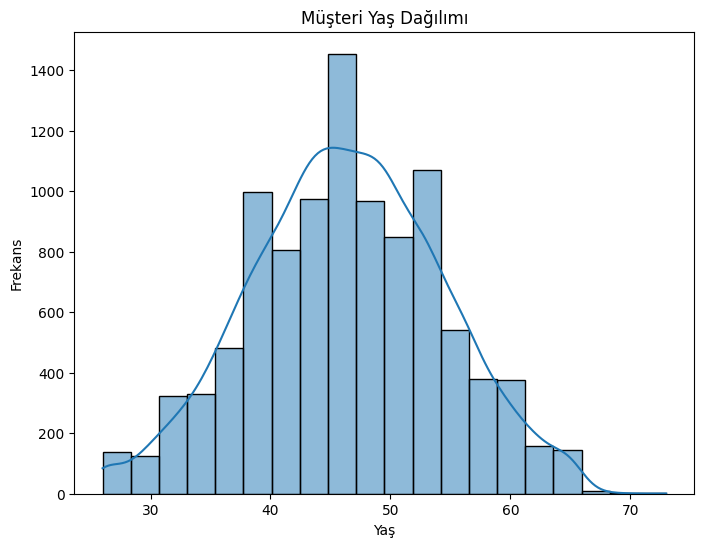

In [228]:

plt.figure(figsize=(8, 6))
sns.histplot(df['Customer_Age'], bins=20, kde=True)
plt.title('Müşteri Yaş Dağılımı')
plt.xlabel('Yaş')
plt.ylabel('Frekans')
plt.show()

Müşteri Yaş Dağılımı grafiği, müşterilerin çoğunun 40 ile 60 yaş arasında yoğunlaştığını gösteriyor. 50 yaş en yüksek yoğunluğa sahipken, yaş arttıkça müşteri sayısı azalmış. Bu dağılım, özellikle 50 yaş ve üzeri müşteriler için özel stratejiler geliştirmeyi gerektirebilir.

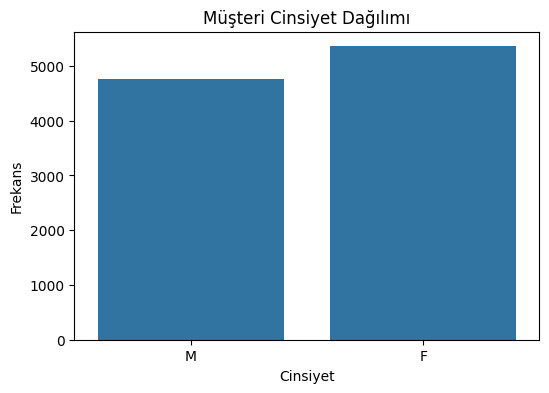

In [229]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=df)
plt.title('Müşteri Cinsiyet Dağılımı')
plt.xlabel('Cinsiyet')
plt.ylabel('Frekans')
plt.show()

Cinsiyet dağılımı eşit görünüyor; bankanın müşteri kitlesi, cinsiyet açısından dengeli bir profil sergiliyor. Bu durum, cinsiyet temelli özel stratejiler geliştirmek için fazla ihtiyaç olmayabileceğini gösteriyor.

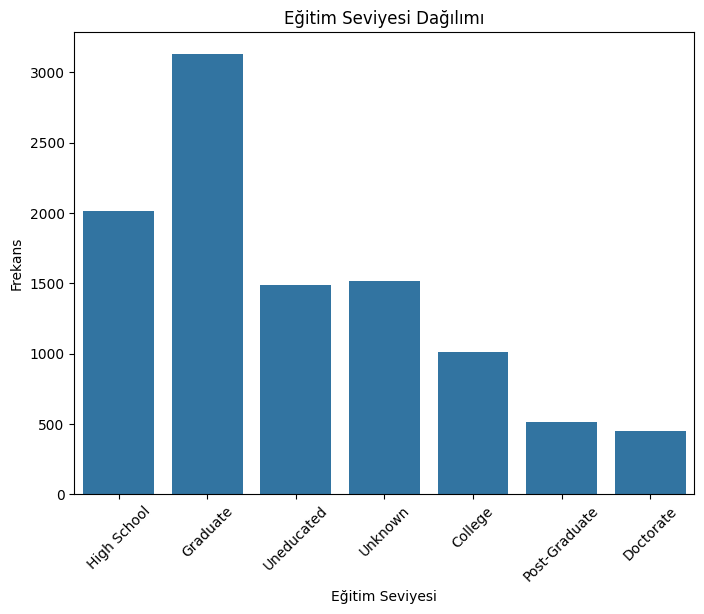

In [230]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Education_Level', data=df)
plt.title('Eğitim Seviyesi Dağılımı')
plt.xlabel('Eğitim Seviyesi')
plt.ylabel('Frekans')
plt.xticks(rotation=45)
plt.show()

En yüksek müşteri yoğunluğu High School ve Graduate seviyelerinde, bu da bankanın hedef kitlesinin çoğunun lise ve üniversite mezunu olduğunu gösteriyor. Bu bilgi, eğitim seviyelerine göre farklı stratejiler geliştirmek için faydalı olabilir.

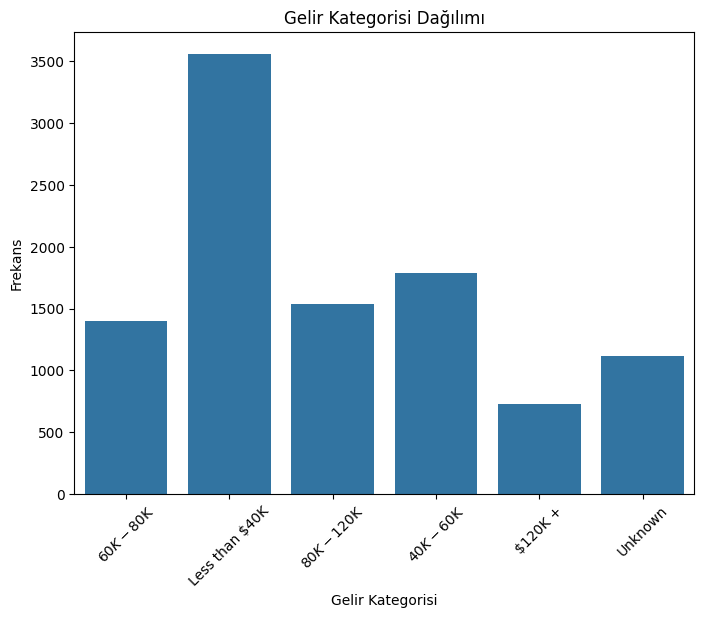

In [231]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Income_Category', data=df)
plt.title('Gelir Kategorisi Dağılımı')
plt.xlabel('Gelir Kategorisi')
plt.ylabel('Frekans')
plt.xticks(rotation=45)
plt.show()

Gelir kategorisi dağılımına göre, bankanın müşteri kitlesinin büyük çoğunluğu düşük gelirli. Bu, bankanın daha düşük gelirli bireylere yönelik stratejiler geliştirmesi gerektiğini gösteriyor.

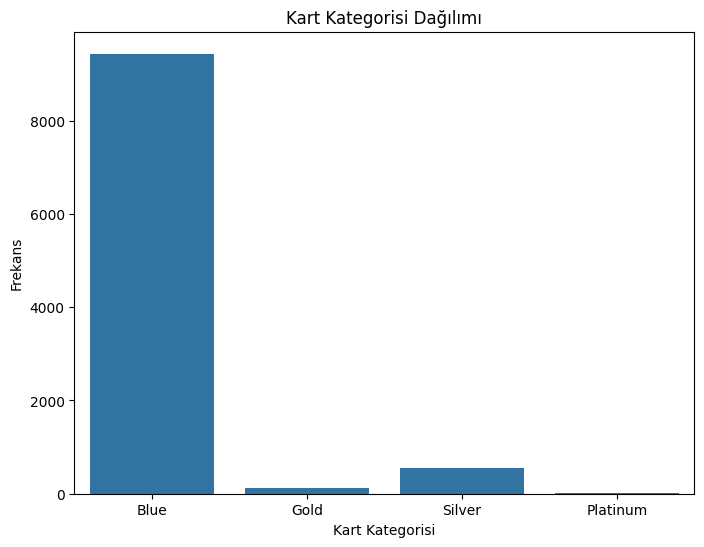

In [232]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Card_Category', data=df)
plt.title('Kart Kategorisi Dağılımı')
plt.xlabel('Kart Kategorisi')
plt.ylabel('Frekans')
plt.show()

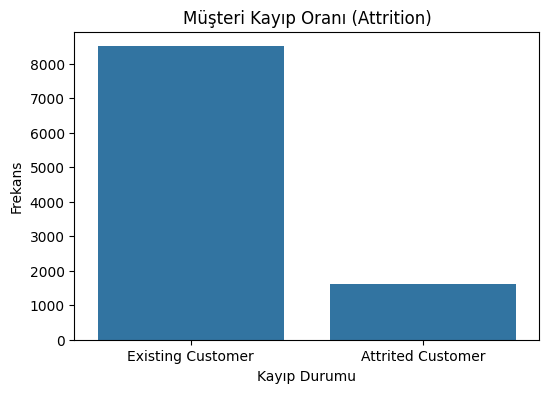

In [233]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Attrition_Flag', data=df)
plt.title('Müşteri Kayıp Oranı (Attrition)')
plt.xlabel('Kayıp Durumu')
plt.ylabel('Frekans')
plt.show()

# 1. Müşterilerin çoğu Mavi Kart sahibi ve yıllık geliri $40K'ın altında.
Mavi Kart sahiplerinin sayısı ve yıllık geliri $40K'ın altında olanların yüzdesini 
bulalım

In [234]:
# 1. Mavi Kart sahiplerini filtreleme
blue_card_customers = df[df['Card_Category'] == 'Blue']

# Mavi Kart sahiplerinin sayısı
blue_card_count = blue_card_customers.shape[0]

# 2. Yıllık geliri $40K'ın altında olanları filtreleme
low_income_customers = df[df['Income_Category'].isin(['Less than $40K', '$40K - $60K'])]

# Yıllık geliri $40K'ın altında olanların sayısı
low_income_count = low_income_customers.shape[0]

# 3. Mavi Kart sahiplerinin ve geliri $40K'ın altında olanların yüzdesi
low_income_percentage = (low_income_customers[low_income_customers['Card_Category'] == 'Blue'].shape[0] / blue_card_count) * 100

print(f"mavi kart sahiplerinin sayısı= {blue_card_count}")

print(f"mavi kart sahiplerinin ve geliri $40k nın altında olanların oranı   %{low_income_percentage} ")



mavi kart sahiplerinin sayısı= 9436
mavi kart sahiplerinin ve geliri $40k nın altında olanların oranı   %53.81517592200085 


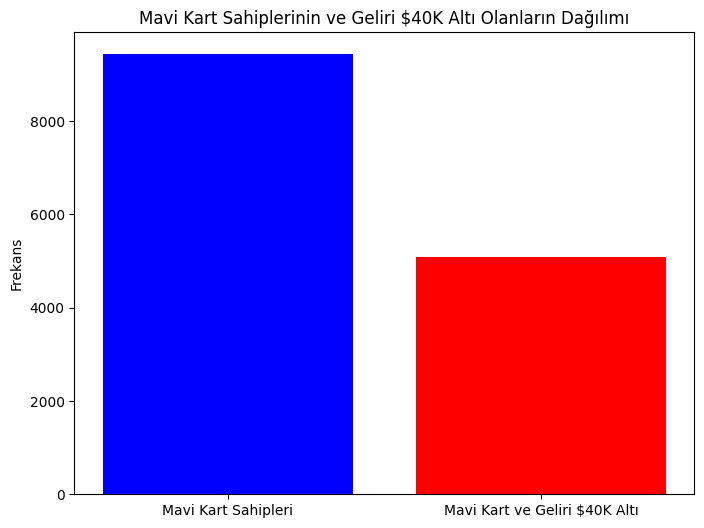

In [235]:

# Veriyi hazırlama
categories = ['Mavi Kart Sahipleri', 'Mavi Kart ve Geliri $40K Altı']
values = [blue_card_count, (low_income_customers[low_income_customers['Card_Category'] == 'Blue'].shape[0])]

# Görselleştirme
plt.figure(figsize=(8, 6))
plt.bar(categories, values, color=['blue', 'red'])
plt.title('Mavi Kart Sahiplerinin ve Geliri $40K Altı Olanların Dağılımı')
plt.ylabel('Frekans')
plt.show()


# kayıp oranlarını hesaplayalım

In [236]:
# Altın Kart sahiplerini ve gelir kategorisini kontrol edelim
gold_customers = df[(df['Card_Category'] == 'Gold') & 
                     ((df['Income_Category'] == '$40K - $60K') | 
                      (df['Income_Category'] == '$60K - $80K'))]

# Bu filtrelemeye uyan müşteri sayısını kontrol edelim
print(f"Altın Kart ve $40K-$80K geliri olan müşteri sayısı: {gold_customers.shape[0]}")


Altın Kart ve $40K-$80K geliri olan müşteri sayısı: 44


In [237]:
# Kayıp müşteri sayısını kontrol edelim
attrition_counts_gold = gold_customers['Attrition_Flag'].value_counts()

# Kayıp müşterileri yazdıralım
print(f"Altın kart sahiplerinden yıpranmış müşteri sayısı: {attrition_counts_gold.get(1, 0)}")


Altın kart sahiplerinden yıpranmış müşteri sayısı: 8


/tmp/ipykernel_1814/3532740101.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Altın kart sahiplerinden yıpranmış müşteri sayısı: {attrition_counts_gold.get(1, 0)}")


In [238]:
# Attrition_Flag sütunundaki benzersiz değerleri kontrol edelim
print(gold_customers['Attrition_Flag'].unique())


['Existing Customer' 'Attrited Customer']


In [239]:
# Kayıp ve mevcut müşteri sayısını hesaplayalım
attrition_counts_gold = gold_customers['Attrition_Flag'].value_counts()

# Kayıp müşteri sayısı (1 = Attrited Customer)
attrited_customers_gold = attrition_counts_gold[1]

# Toplam Altın Kart sahibi sayısı
total_gold_customers = attrition_counts_gold.sum()

# Kayıp oranını hesaplayalım
attrition_rate_gold = (attrited_customers_gold / total_gold_customers) * 100

# Kayıp oranını yazdıralım
print(f"Altın Kart Kayıp Oranı: %{attrition_rate_gold:.2f}")


Altın Kart Kayıp Oranı: %18.18


/tmp/ipykernel_1814/4193927419.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  attrited_customers_gold = attrition_counts_gold[1]


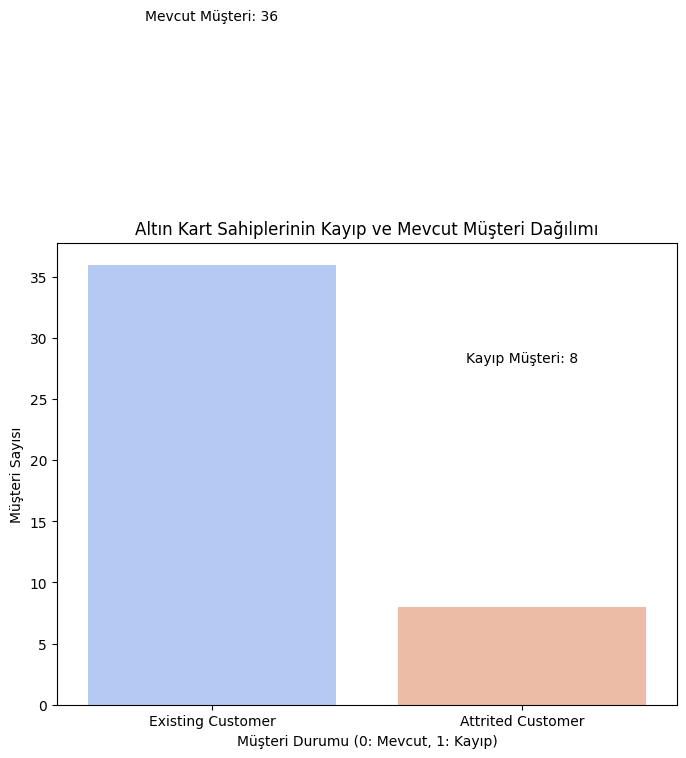

In [263]:
attrition_counts_gold = gold_customers['Attrition_Flag'].value_counts()

# Görselleştirme
plt.figure(figsize=(8, 6))
sns.barplot(x=attrition_counts_gold.index, y=attrition_counts_gold.values, hue=attrition_counts_gold.index, palette='coolwarm')

# Başlık ve etiketler
plt.title('Altın Kart Sahiplerinin Kayıp ve Mevcut Müşteri Dağılımı')
plt.xlabel('Müşteri Durumu (0: Mevcut, 1: Kayıp)')
plt.ylabel('Müşteri Sayısı')

# Yıpranma oranını da ekleyelim
plt.text(0, attrition_counts_gold.iloc[0] + 20, f'Mevcut Müşteri: {attrition_counts_gold.iloc[0]}', ha='center')
plt.text(1, attrition_counts_gold.iloc[1] + 20, f'Kayıp Müşteri: {attrition_counts_gold.iloc[1]}', ha='center')

plt.show()


In [241]:
# 1. Kayıp oranı yüksek olan müşterileri filtreleyelim
high_attrition_customers = df[df['Attrition_Flag'] == 'Attrited Customer']

# 2. Bu müşterilerin banka ile iletişim sayısını alalım
communication_count = high_attrition_customers['Contacts_Count_12_mon']

# 3. Kayıp oranı ve iletişim sayısının genel istatistiklerini hesaplayalım
mean_communication_count = communication_count.mean()
median_communication_count = communication_count.median()

mean_communication_count = float(mean_communication_count) 
median_communication_count = float(median_communication_count)

print(mean_communication_count, median_communication_count)


2.972341733251383 3.0


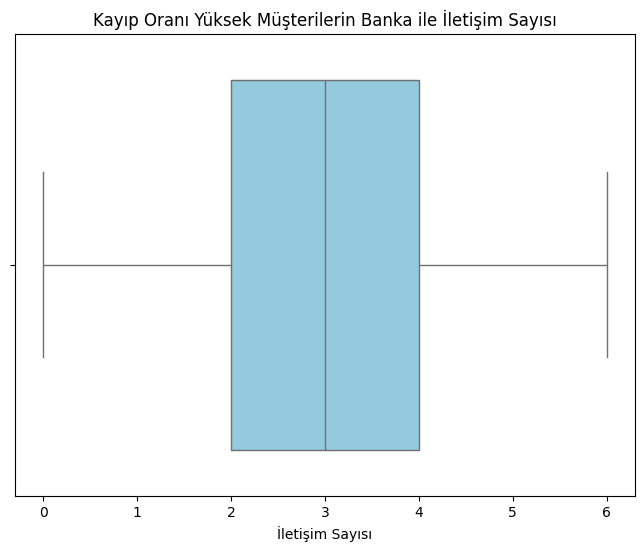

In [242]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=high_attrition_customers['Contacts_Count_12_mon'], color='skyblue')
plt.title('Kayıp Oranı Yüksek Müşterilerin Banka ile İletişim Sayısı')
plt.xlabel('İletişim Sayısı')
plt.show()


Bu sonuçlar, kayıp oranı yüksek olan müşterilerin, banka ile ortalama 3 kez iletişim kurduğunu ve çoğu müşterinin banka ile 3 kez iletişimde bulunduğunu gösteriyor.



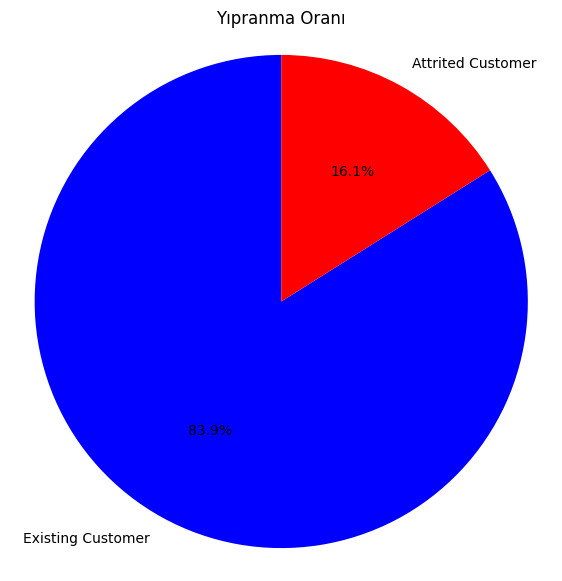

In [243]:
# Yıpranmış ve yıpranmamış müşteri sayısını hesaplayalım
attrition_counts = df['Attrition_Flag'].value_counts()

plt.figure(figsize=(7, 7))
plt.pie(attrition_counts, labels=attrition_counts.index, autopct='%1.1f%%', startangle=90, colors=["blue","red"])
plt.title("Yıpranma Oranı")
plt.axis('equal')  
plt.show()

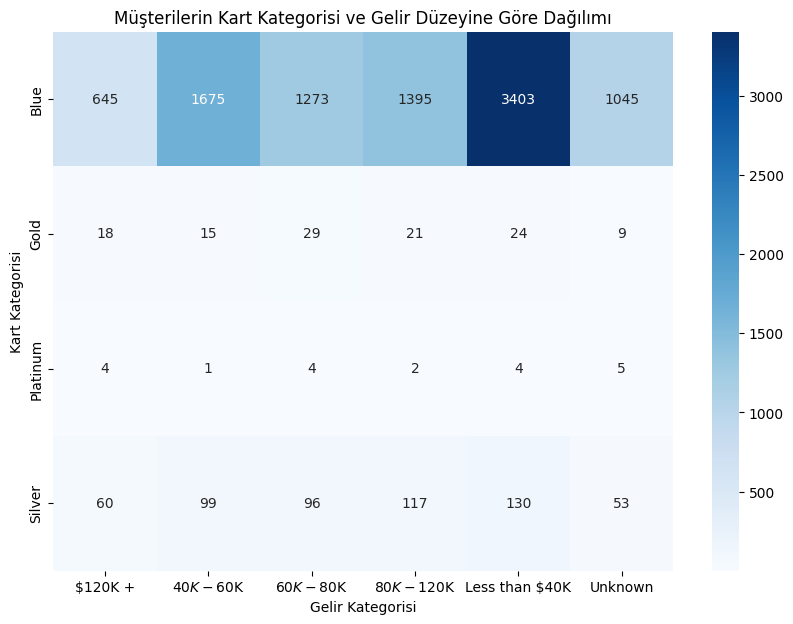

In [244]:
# Card_Category ve Income_Category'ye göre müşteri sayılarının pivot tablosunu oluşturuyoruz
pivot_table = df.pivot_table(index='Card_Category', columns='Income_Category', values='CLIENTNUM', aggfunc='count')

plt.figure(figsize=(10, 7))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap="Blues", cbar=True)
plt.title('Müşterilerin Kart Kategorisi ve Gelir Düzeyine Göre Dağılımı')
plt.xlabel('Gelir Kategorisi')
plt.ylabel('Kart Kategorisi')
plt.show()


Isı haritası, Blue kart sahiplerinin çoğunlukla $40K-$80K gelir aralığında yoğunlaştığını gösteriyor

In [276]:
# Yaş aralıklarını belirleyelim
bins = [35, 45, 55, 65, 100]
labels = ['36-45', '46-55', '56-65', '65+']

# Yaş sütununu yaş aralıklarına göre gruplayalım
df['Age_Group'] = pd.cut(df['Customer_Age'], bins=bins, labels=labels, right=False)

# Mavi Kart ve $40K altı gelirli müşterileri filtreleyelim
blue_low_income = df[(df['Card_Category'] == 'Blue') & (df['Income_Category'].isin(['Less than $40K', '$40K - $60K']))]

# Debugging: Check the size of the filtered DataFrame
print(blue_low_income.shape)
print(blue_low_income.head())

# Check unique values in relevant columns
print(df['Card_Category'].unique())
print(df['Income_Category'].unique())
print(df['Age_Group'].unique())
print(df['Gender'].unique())

# If the DataFrame is not empty, proceed with the pivot table and heatmap
if not blue_low_income.empty:
    pivot_table = blue_low_income.pivot_table(index='Age_Group', columns='Gender', values='CLIENTNUM', aggfunc='count', observed=False)

    # Isı haritası (heatmap) görselleştirmesi
    plt.figure(figsize=(10, 7))
    sns.heatmap(pivot_table, annot=True, fmt='d', cmap="Blues", cbar=True)
    plt.title('Mavi Kart Sahibi ve $40K Altı Geliri Olan Müşterilerin Yaş ve Cinsiyet Dağılımı')
    plt.xlabel('Cinsiyet')
    plt.ylabel('Yaş Grubu')
    plt.show()
else:
    print("No data available for the given filters.")


(0, 24)
Empty DataFrame
Columns: [CLIENTNUM, Attrition_Flag, Customer_Age, Gender, Dependent_count, Education_Level, Marital_Status, Income_Category, Card_Category, Months_on_book, Total_Relationship_Count, Months_Inactive_12_mon, Contacts_Count_12_mon, Credit_Limit, Total_Revolving_Bal, Avg_Open_To_Buy, Total_Amt_Chng_Q4_Q1, Total_Trans_Amt, Total_Trans_Ct, Total_Ct_Chng_Q4_Q1, Avg_Utilization_Ratio, Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1, Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2, Age_Group]
Index: []

[0 rows x 24 columns]
[0 1 3 2]
[2 4 3 1 0 5]
['46-55', '36-45', NaN, '65+', '56-65']
Categories (4, object): ['36-45' < '46-55' < '56-65' < '65+']
[1 0]
No data available for the given filters.


In [280]:
# Gelir ve kart kategorisi sütunlarına göre gruplayalım ve her grubun yıpranma oranını hesaplayalım
attrition_rate = df.groupby(['Card_Category', 'Income_Category', 'Attrition_Flag']).size().unstack(fill_value=0)

# Check the structure of the DataFrame
print(attrition_rate.head())
print(attrition_rate.columns)


Attrition_Flag                   0     1
Card_Category Income_Category           
0             0                113   532
              1                257  1418
              2                172  1101
              3                215  1180
              4                586  2817
Index([0, 1], dtype='int64', name='Attrition_Flag')


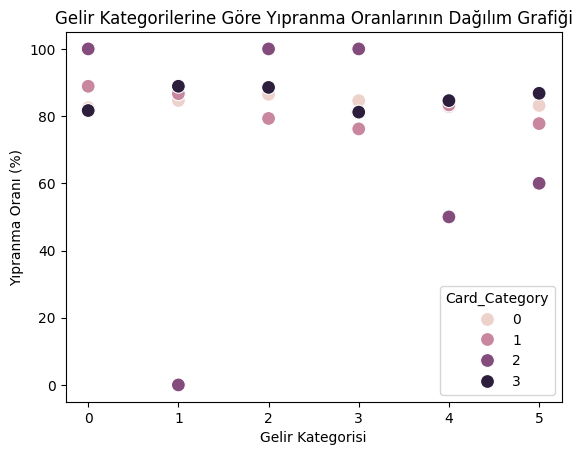

In [283]:
# Recalculate the attrition rate based on the columns 0 (Existing) and 1 (Attrited)
attrition_rate['Attrition_Rate'] = (attrition_rate[1] / 
                                    (attrition_rate[0] + attrition_rate[1])) * 100

# Reset index to flatten the MultiIndex
attrition_rate = attrition_rate.reset_index()

# plt.figure(figsize=(12, 7))
sns.scatterplot(x='Income_Category', y='Attrition_Rate', hue='Card_Category', data=attrition_rate, s=100)
plt.title('Gelir Kategorilerine Göre Yıpranma Oranlarının Dağılım Grafiği')
plt.xlabel('Gelir Kategorisi')
plt.ylabel('Yıpranma Oranı (%)')
plt.show()



Geliri $40K-$60K olan Platinum kart sahiplerinin yıpranma oranı en yüksek.
Blue kart sahiplerinde ise, genellikle daha düşük bir kayıp oranı gözlemleniyor.

<Figure size 1200x800 with 0 Axes>

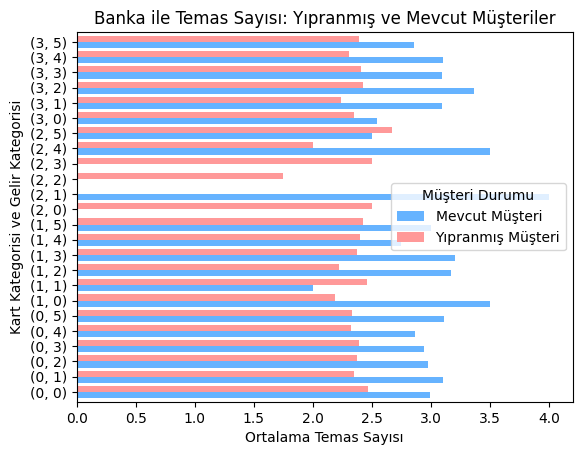

In [275]:
# Yıpranmış ve mevcut müşterilerin banka ile iletişim sayısını gruplandıralım
contact_data = df.groupby(['Card_Category', 'Income_Category', 'Attrition_Flag'])['Contacts_Count_12_mon'].mean().unstack()
plt.figure(figsize=(12, 8))
contact_data.plot(kind='barh', stacked=False, color=["#66b3ff", "#ff9999"], width=0.8)
plt.title('Banka ile Temas Sayısı: Yıpranmış ve Mevcut Müşteriler')
plt.xlabel('Ortalama Temas Sayısı')
plt.ylabel('Kart Kategorisi ve Gelir Kategorisi')
plt.legend(title='Müşteri Durumu', labels=['Mevcut Müşteri', 'Yıpranmış Müşteri'])
plt.show()


<Figure size 1200x800 with 0 Axes>

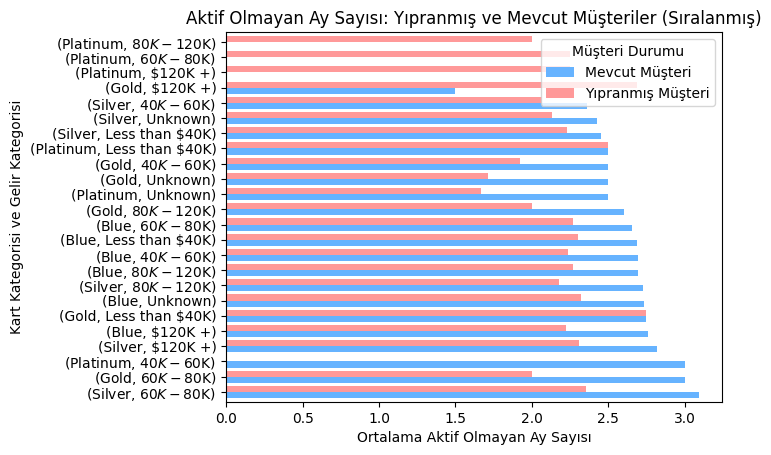

In [248]:
# Yıpranmış ve mevcut müşterilerin ortalama aktif olmayan ay sayısını hesaplayalım
inactive_data = df.groupby(['Card_Category', 'Income_Category', 'Attrition_Flag'])['Months_Inactive_12_mon'].mean().unstack()
inactive_data_sorted = inactive_data.sort_values(by='Attrited Customer', axis=0, ascending=False)
plt.figure(figsize=(12, 8))
inactive_data_sorted.plot(kind='barh', stacked=False, color=["#66b3ff", "#ff9999"], width=0.8)
plt.title('Aktif Olmayan Ay Sayısı: Yıpranmış ve Mevcut Müşteriler (Sıralanmış)')
plt.xlabel('Ortalama Aktif Olmayan Ay Sayısı')
plt.ylabel('Kart Kategorisi ve Gelir Kategorisi')
plt.legend(title='Müşteri Durumu', labels=['Mevcut Müşteri', 'Yıpranmış Müşteri'])
plt.show()


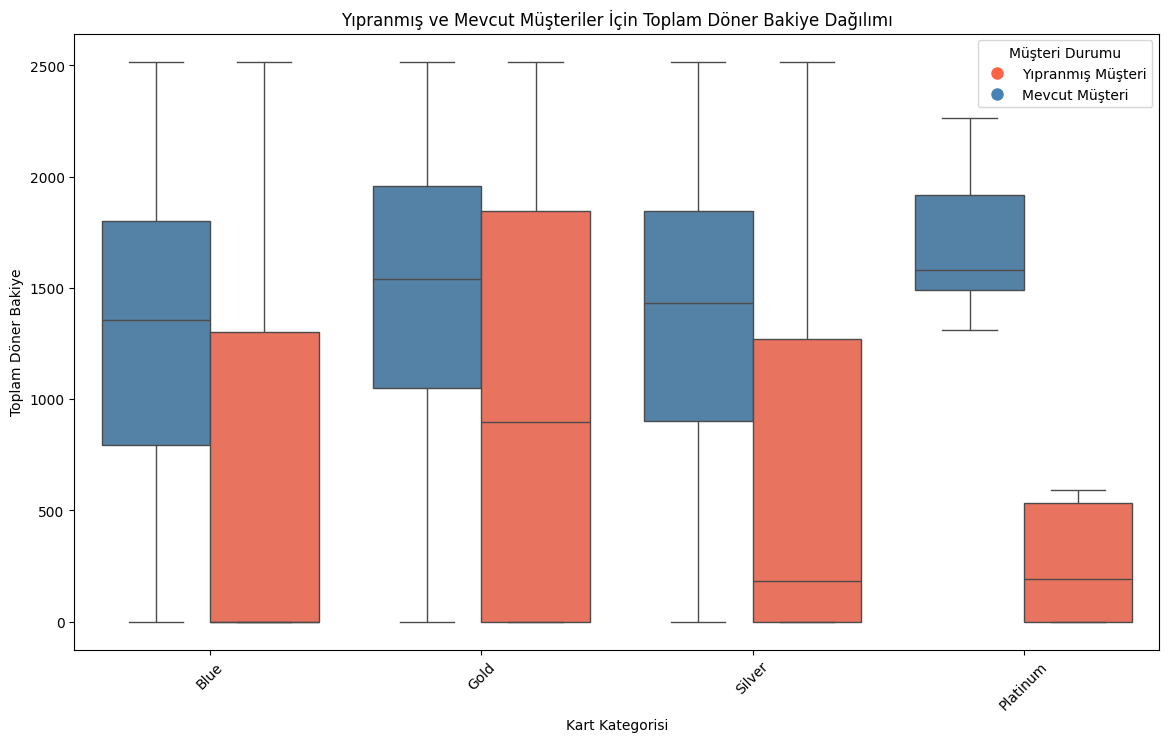

In [249]:
plt.figure(figsize=(14, 8))

# Toplam döner bakiyeyi ve müşteri durumunu gruplandırıp görselleştirelim
sns.boxplot(x='Card_Category', y='Total_Revolving_Bal', hue='Attrition_Flag', 
            data=df, palette={"Attrited Customer": "#FF6347", "Existing Customer": "#4682B4"}, showfliers=False)

# Grafik başlığı ve etiketler
plt.title('Yıpranmış ve Mevcut Müşteriler İçin Toplam Döner Bakiye Dağılımı')
plt.xlabel('Kart Kategorisi')
plt.ylabel('Toplam Döner Bakiye')

# Özel Legend renkleri
handles = [Line2D([0], [0], marker='o', color='w', markerfacecolor='#FF6347', markersize=10, label='Yıpranmış Müşteri'),
           Line2D([0], [0], marker='o', color='w', markerfacecolor='#4682B4', markersize=10, label='Mevcut Müşteri')]

plt.legend(handles=handles, title='Müşteri Durumu')
plt.xticks(rotation=45)
plt.show()


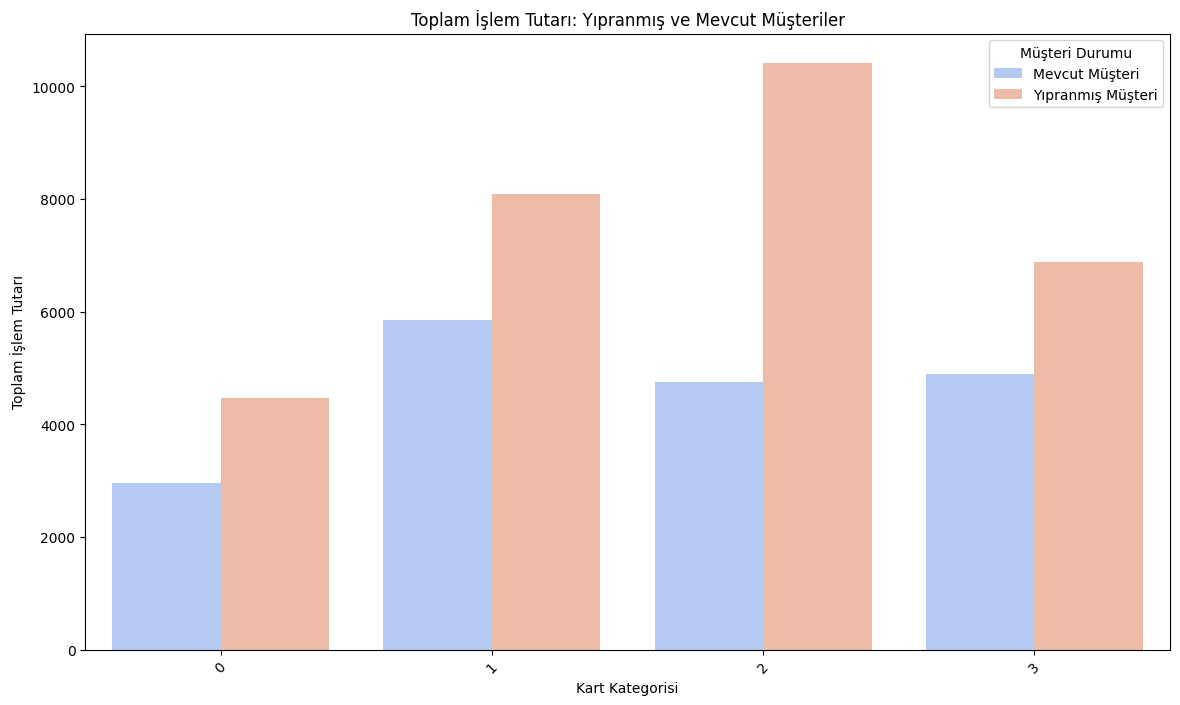

In [284]:
plt.figure(figsize=(14, 8))
sns.barplot(x='Card_Category', y='Total_Trans_Amt', hue='Attrition_Flag', data=df, errorbar=None, palette="coolwarm")
plt.title('Toplam İşlem Tutarı: Yıpranmış ve Mevcut Müşteriler')
plt.xlabel('Kart Kategorisi')
plt.ylabel('Toplam İşlem Tutarı')
plt.legend(title='Müşteri Durumu', labels=['Mevcut Müşteri', 'Yıpranmış Müşteri'])
plt.xticks(rotation=45)
plt.show()


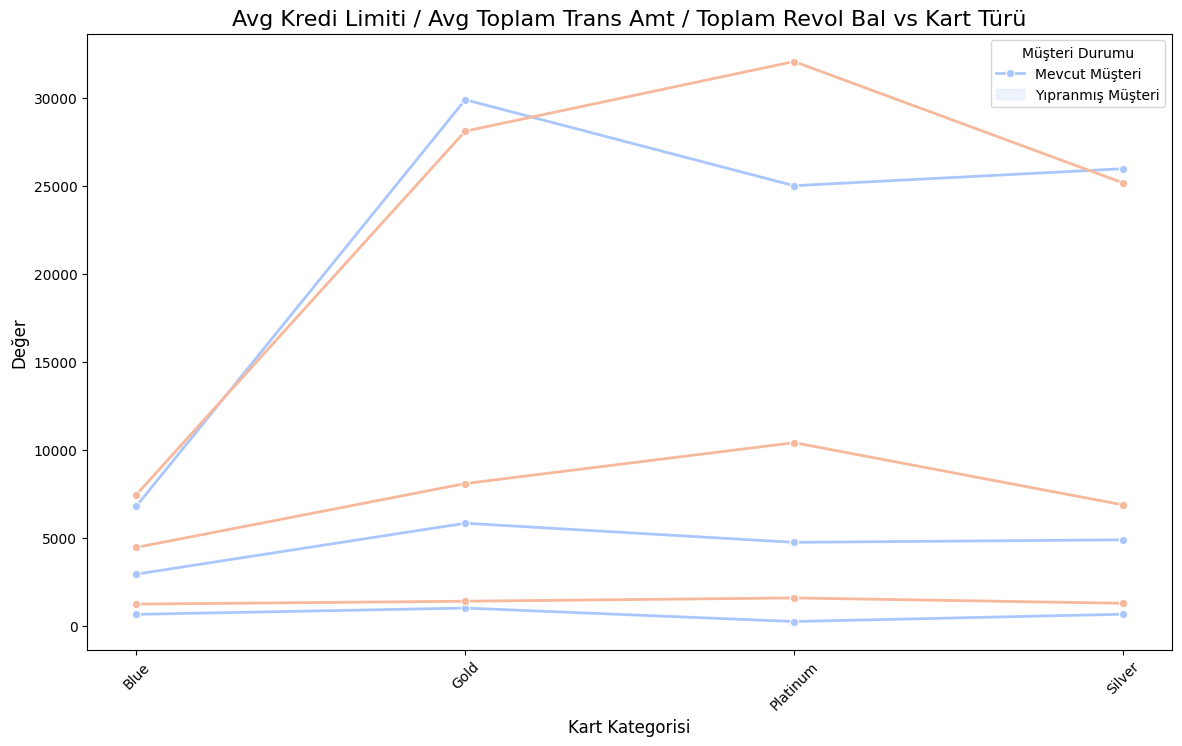

In [251]:


# Kredi limiti, toplam işlem tutarı ve döner bakiyeyi içeren veri oluşturuyoruz
df_avg = df.groupby(['Card_Category', 'Attrition_Flag']).agg({
    'Credit_Limit': 'mean',
    'Total_Trans_Amt': 'mean',
    'Total_Revolving_Bal': 'mean'
}).reset_index()

# Çizgi grafik ile görselleştirme
plt.figure(figsize=(14, 8))

# Çizgi grafik: Kredi Limiti, Toplam İşlem Tutarı ve Toplam Döner Bakiye
sns.lineplot(x='Card_Category', y='Credit_Limit', hue='Attrition_Flag', data=df_avg, marker='o', lw=2, palette="coolwarm")
sns.lineplot(x='Card_Category', y='Total_Trans_Amt', hue='Attrition_Flag', data=df_avg, marker='o', lw=2, palette="coolwarm")
sns.lineplot(x='Card_Category', y='Total_Revolving_Bal', hue='Attrition_Flag', data=df_avg, marker='o', lw=2, palette="coolwarm")

# Başlık ve etiketler
plt.title('Avg Kredi Limiti / Avg Toplam Trans Amt / Toplam Revol Bal vs Kart Türü', fontsize=16)
plt.xlabel('Kart Kategorisi', fontsize=12)
plt.ylabel('Değer', fontsize=12)

# Grafik etiketleri ve çizgi renkleri
plt.legend(title='Müşteri Durumu', labels=['Mevcut Müşteri', 'Yıpranmış Müşteri'])

# X eksenindeki etiketlerin açılarını ayarlayalım
plt.xticks(rotation=45)
plt.show()



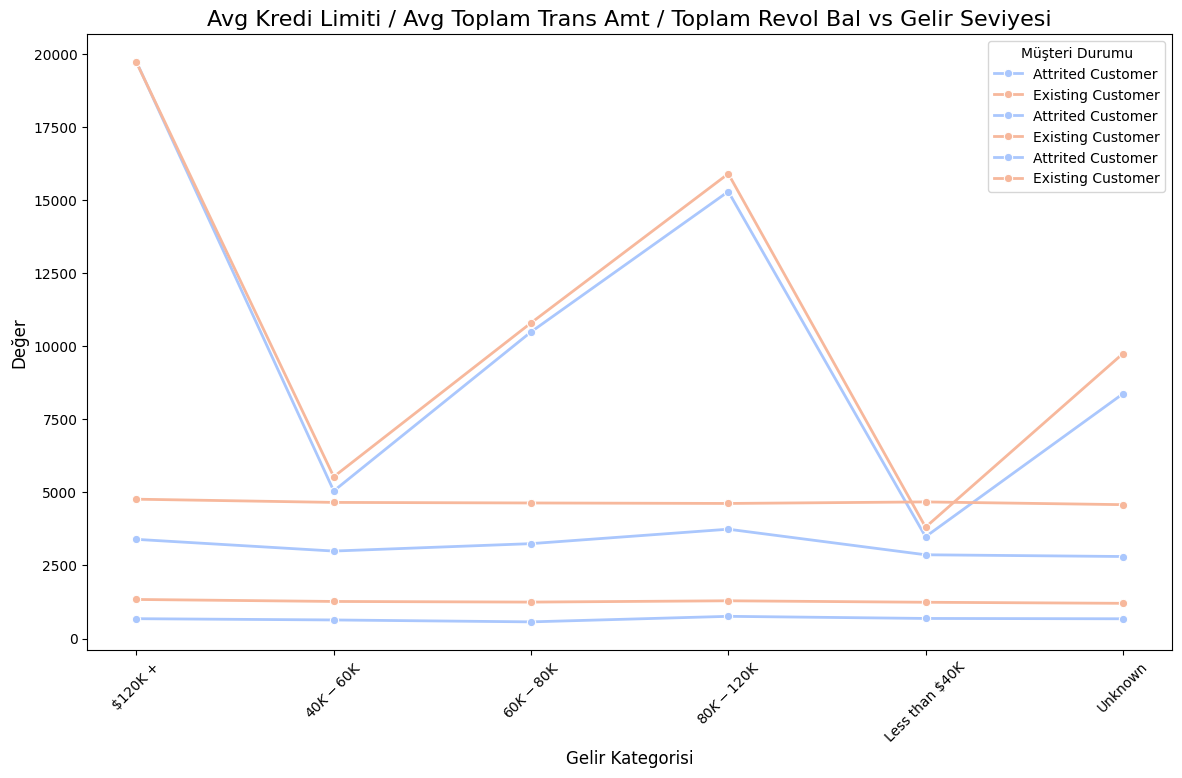

In [252]:


# Gelir kategorisi ve müşteri durumu ile gruplandırarak ortalama değerleri hesaplıyoruz
df_avg = df.groupby(['Income_Category', 'Attrition_Flag']).agg({
    'Credit_Limit': 'mean',
    'Total_Trans_Amt': 'mean',
    'Total_Revolving_Bal': 'mean'
}).reset_index()

# Çizgi grafik ile görselleştirme
plt.figure(figsize=(14, 8))

# Çizgi grafik: Kredi Limiti, Toplam İşlem Tutarı ve Toplam Döner Bakiye
sns.lineplot(x='Income_Category', y='Credit_Limit', hue='Attrition_Flag', data=df_avg, marker='o', lw=2, palette="coolwarm")
sns.lineplot(x='Income_Category', y='Total_Trans_Amt', hue='Attrition_Flag', data=df_avg, marker='o', lw=2, palette="coolwarm")
sns.lineplot(x='Income_Category', y='Total_Revolving_Bal', hue='Attrition_Flag', data=df_avg, marker='o', lw=2, palette="coolwarm")

# Başlık ve etiketler
plt.title('Avg Kredi Limiti / Avg Toplam Trans Amt / Toplam Revol Bal vs Gelir Seviyesi', fontsize=16)
plt.xlabel('Gelir Kategorisi', fontsize=12)
plt.ylabel('Değer', fontsize=12)

# Grafik etiketleri ve çizgi renkleri
plt.legend(title='Müşteri Durumu')

# X eksenindeki etiketlerin açılarını ayarlayalım
plt.xticks(rotation=45)
plt.show()


In [253]:
# Yaş grubu sütunu için manuel dönüşüm
age_group_map = {
    '18-25': 20,
    '26-35': 30,
    '36-45': 40,
    '46-55': 50,
    '56+': 60
}

df['Age_Group'] = df['Age_Group'].map(age_group_map)

# Değişiklikleri kontrol et
print(df['Age_Group'].head())


0    50.0
1    50.0
2    50.0
3    40.0
4    40.0
Name: Age_Group, dtype: float64


In [254]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = ['Gender', 'Education_Level', 'Income_Category', 'Marital_Status', 'Card_Category', 'Attrition_Flag']

label_encoder = LabelEncoder()
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Kontrol et
print(df.head())


   CLIENTNUM  Attrition_Flag  Customer_Age  Gender  Dependent_count  \
0  768805383               1            45       1                3   
1  818770008               1            49       0                5   
2  713982108               1            51       1                3   
3  769911858               1            40       0                4   
4  709106358               1            40       1                3   

   Education_Level  Marital_Status  Income_Category  Card_Category  \
0                3               1                2              0   
1                2               2                4              0   
2                2               1                3              0   
3                3               3                4              0   
4                5               1                2              0   

   Months_on_book  ...  Total_Revolving_Bal  Avg_Open_To_Buy  \
0              39  ...                  777          11914.0   
1              44  ...  

# AI (ML) yaparak kayıp müşterileri tahmin edelim


burada daha önceki bilgileri kullanarak müşteri kaybını tahmin edeceğiz ve buna göre bu müşterilere kampanyalar sunabiliriz.

In [256]:
# Özellikler (X) ve hedef değişken (y) ayırma
X = df_cleaned.drop(columns=['Attrition_Flag'])
y = df_cleaned['Attrition_Flag']


In [257]:
from sklearn.model_selection import StratifiedKFold

# 5 katlı çapraz doğrulama
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]


In [258]:
from sklearn.ensemble import RandomForestClassifier

# Modeli tanımlayalım ve bazı parametreleri optimize edelim
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Modeli eğitim verileri ile eğitelim
model.fit(X_train, y_train)

# Test verileri üzerinde tahmin yapalım
y_pred = model.predict(X_test)

# Sonuçları değerlendirelim
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.95      0.77      0.85       325
           1       0.96      0.99      0.97      1700

    accuracy                           0.96      2025
   macro avg       0.95      0.88      0.91      2025
weighted avg       0.96      0.96      0.95      2025

[[ 250   75]
 [  14 1686]]


In [259]:
from sklearn.ensemble import RandomForestClassifier

# Modeli tanımlayalım ve bazı parametreleri optimize edelim
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Modeli eğitim verileri ile eğitelim
model.fit(X_train, y_train)

# Test verileri üzerinde tahmin yapalım
y_pred = model.predict(X_test)

# Sonuçları değerlendirelim
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.95      0.77      0.85       325
           1       0.96      0.99      0.97      1700

    accuracy                           0.96      2025
   macro avg       0.95      0.88      0.91      2025
weighted avg       0.96      0.96      0.95      2025

[[ 250   75]
 [  14 1686]]


In [261]:
from sklearn.model_selection import GridSearchCV

# Hiperparametreleri belirleyelim
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

# GridSearchCV ile en iyi parametreleri bulalım
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           verbose=2,
                           n_jobs=-1)

# Eğitim verileri ile hiperparametreleri optimize edelim
grid_search.fit(X_train, y_train)

# En iyi parametreleri ve sonucu görelim
print(grid_search.best_params_)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   1.3s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   1.3s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   1.3s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   1.4s
[CV] END max_depth=10, min_samples_split=2, n_estimators=100; total time=   1.1s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=   2.6s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=   2.6s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=   2.7s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=   2.7s
[CV] END max_depth=10, min_samples_split=2, n_estimators=200; total time=   2.3s
[CV] END max_depth=10, min_samples_split=2, n_estimators=300; total time=   3.9s
[CV] END max_depth=10, min_samples_split=2, n_e

In [262]:
# En iyi parametreleri kullanarak modeli oluşturma
best_model = RandomForestClassifier(n_estimators=300, max_depth=None, min_samples_split=2, random_state=42)

# Modeli eğitim verileri ile eğitelim
best_model.fit(X_train, y_train)

# Test verileri üzerinde tahmin yapalım
y_pred_best = best_model.predict(X_test)

# Sonuçları değerlendirelim
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred_best))
print(confusion_matrix(y_test, y_pred_best))


              precision    recall  f1-score   support

           0       0.95      0.82      0.88       325
           1       0.97      0.99      0.98      1700

    accuracy                           0.96      2025
   macro avg       0.96      0.90      0.93      2025
weighted avg       0.96      0.96      0.96      2025

[[ 265   60]
 [  13 1687]]


modelimiz gayet yeterli bir sonuç elde etti bu sonuçu kullanarak bazı stratejiler başlatabiliriz.

Tahminlerimiz, kayıp müşteri oranlarını azaltmak için çok değerli bir araçtır. Bu tahminleri kullanarak, yüksek kayıp riski taşıyan müşterilere yönelik proaktif stratejiler geliştirebilir ve onların sadakatini artırabiliriz. Bu stratejiler arasında özel indirimler, sadakat programları, daha fazla müşteri etkileşimi gibi farklı yöntemler bulunmaktadır.

Yüksek Kayıp Riski Olan Müşterileri Hedefleyin:

1. Özel İndirimler ve Promosyonlar sunun.
Kişisel İletişim kurarak sadakati artırın.
2. Sadakat Programları Başlatın:
Puanlı Sistem veya hediye/indirimler ile müşterilerin bağlılığını artırın.
3. Daha Fazla İletişim Kurun:
Müşteri Etkileşimini artırın (telefon, SMS, e-posta kampanyaları).
4. Yeni Ürün ve Hizmetler Sunun:
Düşük faizli krediler veya özel kartlar gibi teklifler sunarak müşteriyi tutun.
5. Zamanlamaya Dikkat Edin:
Yıl sonu veya tatil dönemi gibi kritik zamanlarda promosyonlar düzenleyin.
6. Segment Bazlı Pazarlama:
Kayıp riski yüksek müşteriler için kişiselleştirilmiş teklifler oluşturun.